## Imágenes que son códigos qr

He encontrado el módulo qrcode, lo instalo si no lo tengo,

In [13]:
!pip install pyqrcode --user

Using legacy 'setup.py install' for pyqrcode, since package 'wheel' is not installed.
    Running setup.py install for pyqrcode ... done


In [14]:
!pip install pyzbar --user

In [3]:
!pip install qrtools --user

Using legacy 'setup.py install' for qrtools, since package 'wheel' is not installed.
    Running setup.py install for qrtools ... done


In [ ]:
!pip install --upgrade pip

Y ahora lo importo junto con pil, numpy y sympy

In [2]:
import qrcode

In [7]:
from PIL import Image
from numpy import *
from sympy import *

In [8]:
import numpy as np

Voy a definir una función para escribir un código qr utilizando el módulo qrcode

In [9]:
def codigoqr(string):
    t=string
    codigo=qrcode.make(t)
    nombre=input('introduzca el nombre del código:')+'.png'
    archivo=open(nombre,'wb')
    codigo.save(archivo)
    archivo.close()
    kk=Image.open(nombre)
    return kk
    

introduzca el nombre del código:test


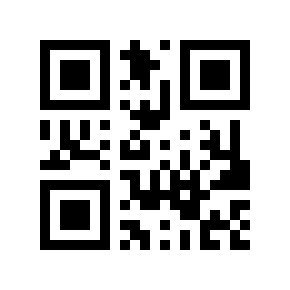

In [10]:
codigoqr('días')

introduzca el nombre del código:ugr


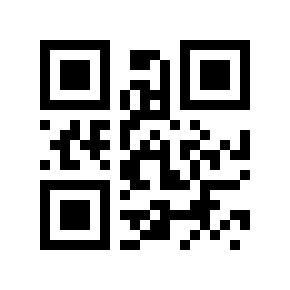

In [6]:
codigoqr('http://ugr.es')

In [172]:
from PIL import Image
from pyzbar.pyzbar import decode


result = decode(Image.open('test.png'))
print(result[0][0].decode("utf-8"))

d穩as


## Yo he instalado una app en mi teléfono para leer estos códigos qr ¿Puedes encontrar un módulo para leer códigos qr en un jupyter notebook (que funcione)?

Veamos como son las imágenes que guarda la función codigoqr.

In [26]:
h=Image.open('test.png')

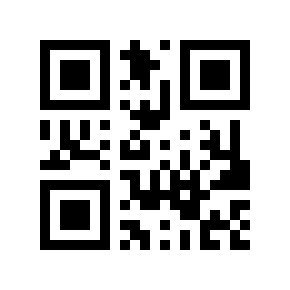

In [27]:
h

In [ ]:
type(h)

In [48]:
mh=h.load()

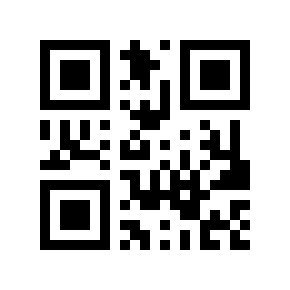

In [46]:
import numpy
Image.fromarray(numpy.asarray(h))

In [ ]:
size(h)

Cargamos un par de valores para ver como son

In [ ]:
mh[0,0], mh[190,100]

Vemos que ya no es una imagen RGB, es una imagen en blanco y negro.

Veamos como es la array de numpy asociada

In [ ]:
npmh=np.array(h)

In [ ]:
npmh[0,0],npmh[190,100]

**?¿?¿Qué ha pasado?¿?¿**

**Ejercicio 1.-** 

+ Definir una función para obtener el negativo de una imagen que sea un código qr.
+ ¿Se puede descodificar el negativo?

In [44]:
def negativo(img):
    img_temp = img.copy()
    img_matrix = img_temp.load()
    n,m = img_temp.size
    for i in range(n):
        for j in range(m):
            img_matrix[i,j] = not img_matrix[i,j]
    return img_temp

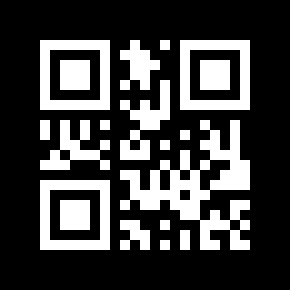

In [45]:
negativo(h)

**Ejercicio 2.-** Aplicar funciones que cambien los colores de la imagen de un código qr (por ejemplo blanco a azul, negro a rojo) y ver si se puede seguir descodificando el código.

In [128]:
def set_color(img,num):
    img_copy = img.copy()
    img_copy = img_copy.convert('RGB')
    n,m = img_copy.size
    img_matrix = img_copy.load()
    for i in range(n):
        for j in range(m):
            if img_matrix[i,j] == (0,0,0):
                img_matrix[i,j] = (num[0],num[1],num[2])
    return img_copy

In [129]:
t = set_color(h,(93, 188, 210))

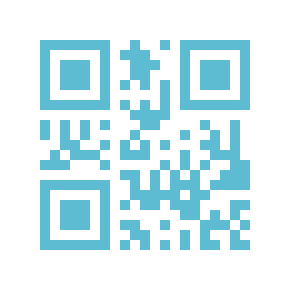

In [130]:
t

**Ejercicio 3.-** Aplicar funciones que giren, hagan una simetría (por ejemplo fip), etc. a la imagen de un código qr y ver cuales se pueden decodificar y cuales no.

**Ejercicio 4.-** Tomar un qr y una imagen, y sustituir el fondo blanco del código qr con los valores de la imagen

In [153]:
def mix_qr(qr,im):
    qr_copy = qr.copy()
    qr_copy = qr_copy.convert('RGB')
    n,m = qr_copy.size
    img_copy = im.copy().convert('RGB').resize((n,m),Image.LANCZOS)
    qr_matrix = qr_copy.load()
    img_matrix = img_copy.load()
    for i in range(n):
        for j in range(m):
            if qr_matrix[i,j] == (0,0,0):
                qr_matrix[i,j] = img_matrix[i,j]
    return qr_copy

In [132]:
lenna = Image.open("Lenna.png")

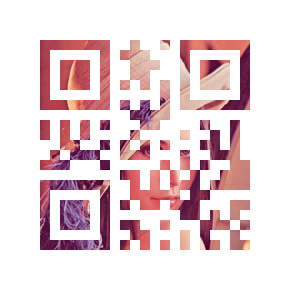

In [154]:
mix_qr(h,lenna)

**Ejercicio 5.-** La funcion toma como argumento una imagen, te solicita la info que quieres meter en un qr, y lo pega en una esquina de la imagen

In [167]:
def add_qr(img,pos):
    
    # En primer lugar, solictamos y creamos el qr
    info=input('Introduzca la información que quiere almacenar en el QR:')
    codigo=qrcode.make(info)
    
    # Ajustamos los tamaños
    
    img_copy = img.copy()
    qr_copy = codigo.copy()
    
    n,m = img_copy.size
    n2,m2 = qr_copy.size
    
    qr_copy = qr_copy.resize((int(n2/5),int(m2/5)),Image.LANCZOS)
    if pos == "tr":
        img_out = img_copy.paste(qr_copy)
        return img_out
    

In [168]:
add_qr(lenna,"tr")

Introduzca la información que quiere almacenar en el QR:asoihd


**Ejercicio 6.-** 
+ Transforma y/o permuta una imagen de un código qr siguiendo técnicas parecidas o totalmente distintas a las dadas en las sesiones 3 y 4. 

+ Sube un jupyter notebook a la carpeta compartida Divertimento con tus iniciales, junto con las imágenes necesarias, dando pistas para que tus compañeros sean capaces de recuperar la imagen original y así leer el código.
+ Elige uno o varios de los ejercicios subidos por tus compañeros y lee los códigos qr que proponen.

Coger un código QR, transformarlo y reventarlo 

Idea, torcer el código QR (de never gonna give you up) en un ángulo concreto, y ocultar el número en una imagen